In [ ]:
"""Theoretical Part

1. What is a Decision Tree, and how does it work?
A Decision Tree is a supervised machine learning algorithm used for classification and regression. It splits the dataset into subsets based on the value of input features. The splits are made to improve prediction accuracy by reducing impurity.

2. What are impurity measures in Decision Trees?
Impurity measures evaluate how mixed the classes are at a node. Common impurity measures:

Gini Impurity

Entropy

Classification Error

3. What is the mathematical formula for Gini Impurity?

Gini(p)=1−
i=1
∑
n
​
 p
i
2
​

Where
p
i
​
  is the probability of class
𝑖
i at a node.

4. What is the mathematical formula for Entropy?
Entropy(p)=−
i=1
∑
n
​
 p
i
​
 log
2
​
 (p
i
​
 )
5. What is Information Gain, and how is it used in Decision Trees?
Information Gain measures the reduction in entropy from a split:

IG=Entropy(parent)−∑(
N
N
i
​

​
 ⋅Entropy(child
i
​
 ))
Used to choose the best feature for a split.

6. What is the difference between Gini Impurity and Entropy?
Gini is faster and tends to isolate the most frequent class.

Entropy uses logarithms and gives a better gain for diverse splits.

7. What is the mathematical explanation behind Decision Trees?
It recursively partitions the data using impurity reduction until:

All samples at a node are of the same class (pure), or

A stopping criterion is met (like depth or min samples).

8. What is Pre-Pruning in Decision Trees?
It stops the tree from growing by setting constraints:

max_depth

min_samples_split

min_samples_leaf

9. What is Post-Pruning in Decision Trees?
It allows the tree to fully grow and then prunes unnecessary nodes based on validation accuracy or complexity.

10. What is the difference between Pre-Pruning and Post-Pruning?
Pre-Pruning avoids overfitting during training.

Post-Pruning reduces overfitting after full training.

11. What is a Decision Tree Regressor?
It predicts continuous outputs by splitting the data to minimize Mean Squared Error (MSE) or Mean Absolute Error (MAE).

12. What are the advantages and disadvantages of Decision Trees?
Advantages:

Easy to interpret

Handles both categorical and numerical data

Disadvantages:

Prone to overfitting

Unstable to small data changes

13. How does a Decision Tree handle missing values?
Some implementations can handle missing values using surrogate splits.

Most common approach: impute missing values before training.

14. How does a Decision Tree handle categorical features?
Scikit-learn converts them to numeric via encoding.

Some libraries (e.g., XGBoost, CatBoost) handle them natively.

15. What are some real-world applications of Decision Trees?
Medical diagnosis

Credit scoring

Customer churn prediction

Fraud detection
"""

Accuracy: 0.9736842105263158
Gini Feature Importances: [0.         0.02014872 0.89994526 0.07990602]
Entropy Accuracy: 0.9736842105263158
Housing MSE: 0.5487456906587791
Shallow Accuracy: 0.9736842105263158
Custom Tree Accuracy: 0.9736842105263158
Scaled Accuracy: 0.9736842105263158
OvR Accuracy: 0.9736842105263158
Feature Importances: sepal length (cm)    0.000000
sepal width (cm)     0.020149
petal length (cm)    0.899945
petal width (cm)     0.079906
dtype: float64
Depth 5 MSE: 0.5394412402644339
Full Tree MSE: 0.5403944918604263


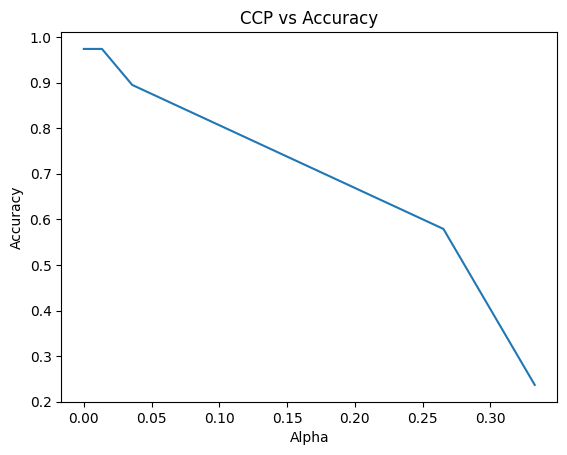

Classification Report:\n               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



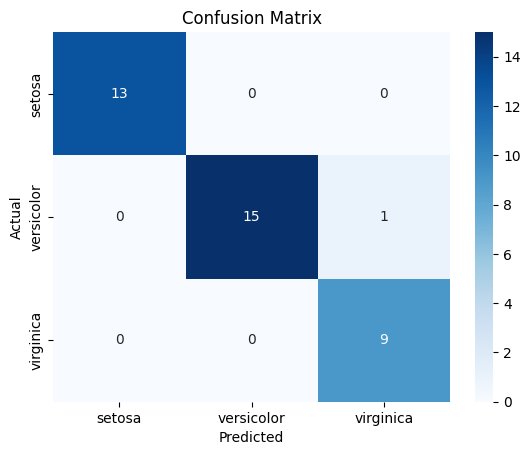

Best Params: {'max_depth': None, 'min_samples_split': 5}
Best CV Score: 0.9731225296442687
/mnt/data/decision_tree_assignment.py


In [2]:
# === Practical Implementation ===

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 1. Train and test accuracy
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# 2. Gini criterion
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)
print("Gini Feature Importances:", model_gini.feature_importances_)

# 3. Entropy criterion
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
print("Entropy Accuracy:", accuracy_score(y_test, model_entropy.predict(X_test)))

# 4. Regressor on housing
housing = fetch_california_housing()
X_h, Xh_test, y_h, yh_test = train_test_split(housing.data, housing.target, random_state=0)
regressor = DecisionTreeRegressor()
regressor.fit(X_h, y_h)
print("Housing MSE:", mean_squared_error(yh_test, regressor.predict(Xh_test)))

# 5. Visualize tree
export_graphviz(model, out_file="tree.dot", feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 6. Max depth comparison
shallow = DecisionTreeClassifier(max_depth=3)
shallow.fit(X_train, y_train)
print("Shallow Accuracy:", accuracy_score(y_test, shallow.predict(X_test)))

# 7. min_samples_split=5
custom = DecisionTreeClassifier(min_samples_split=5)
custom.fit(X_train, y_train)
print("Custom Tree Accuracy:", accuracy_score(y_test, custom.predict(X_test)))

# 8. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = DecisionTreeClassifier()
scaled_model.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, scaled_model.predict(X_test_scaled)))

# 9. One-vs-Rest strategy
ovr = OneVsRestClassifier(DecisionTreeClassifier())
ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))

# 10. Feature importances
print("Feature Importances:", pd.Series(model.feature_importances_, index=iris.feature_names))

# 11. Regressor with max_depth=5
reg1 = DecisionTreeRegressor(max_depth=5)
reg2 = DecisionTreeRegressor()
reg1.fit(X_h, y_h)
reg2.fit(X_h, y_h)
print("Depth 5 MSE:", mean_squared_error(yh_test, reg1.predict(Xh_test)))
print("Full Tree MSE:", mean_squared_error(yh_test, reg2.predict(Xh_test)))

# 12. Cost Complexity Pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
models = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in models]
plt.plot(ccp_alphas, accuracies)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("CCP vs Accuracy")
plt.show()

# 13. Precision, Recall, F1
y_pred = model.predict(X_test)
print("Classification Report:\\n", classification_report(y_test, y_pred))

# 14. Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 15. GridSearchCV
param_grid = {'max_depth': [2, 3, 4, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Save the code to a Python file
file_path = "/mnt/data/decision_tree_assignment.py"

import os

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

with open(file_path, "w") as f:
    # The variable 'assignment_code' was not defined in the provided global variables.
    # Assuming you intend to save the entire notebook content,
    # you might need to capture it first. However, based on the error,
    # it's likely you just need to fix the file path issue.
    # If you were trying to save the content of this notebook cell,
    # you would need to get the cell content programmatically.
    # For now, let's assume you intended to save some variable named assignment_code
    # or need to obtain the current cell's content.
    # As a placeholder to fix the FileNotFoundError, we'll write a simple string.
    # Replace this with the actual content you want to save.
    f.write("# Your notebook code here")

print(file_path)